In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

print("Imported modules.")

Imported modules.


In [41]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame

Data set loaded. Num examples:  252
Made training and test sets


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
200,1.07,12.20,43,178.25,70.25,37.80,102.70,89.20,99.20,60.20,39.20,23.80,31.70,28.40,18.60
42,1.03,31.60,48,217.00,70.00,37.30,113.30,111.20,114.10,67.70,40.90,25.00,36.70,29.80,18.40
15,1.05,20.90,35,162.75,66.00,36.40,99.10,92.80,99.20,63.10,38.70,21.70,31.10,26.40,16.90
126,1.04,27.20,42,177.50,68.75,38.90,98.70,92.10,98.50,60.70,36.80,22.20,33.80,30.30,17.20
81,1.04,26.80,64,150.25,67.25,38.10,97.10,89.00,96.90,54.80,38.00,22.00,29.90,25.20,17.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,1.06,15.20,28,200.50,69.75,41.30,111.40,98.80,104.80,63.40,40.60,24.60,33.00,32.80,19.90
234,1.04,25.80,60,157.75,67.50,40.40,97.20,93.30,94.00,54.30,35.70,21.00,31.30,28.70,18.30
88,1.08,8.30,46,176.75,72.50,38.00,97.30,86.00,99.30,61.00,38.40,23.80,30.20,29.30,18.80
90,1.05,20.50,46,177.00,70.00,37.20,99.70,95.60,102.20,58.30,38.20,22.50,29.10,27.70,17.70


In [42]:
# Keras Input tensors of float values.
inputs = {
    'Density':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Density'),
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'Weight':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Weight'),
    'Height':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Height'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'Chest':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Chest'),
    'Abdomen':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Abdomen'),
    'Hip':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Hip'),
    'Thigh':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Thigh'),
    'Knee':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Knee'),
    'Ankle':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Ankle'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist')
}

#Normalise
density = tf.keras.layers.Normalization(
    name='normalization_density',
    axis=None)
density.adapt(trainDF['Density'])
density = density(inputs['Density'])

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

weight = tf.keras.layers.Normalization(
    name = 'normalization_weight',
    axis=None)
weight.adapt(trainDF['Weight'])
weight = weight(inputs.get('Weight'))

height = tf.keras.layers.Normalization(
    name = 'normalization_height',
    axis=None)
height.adapt(trainDF['Height'])
height = height(inputs.get('Height'))

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

chest = tf.keras.layers.Normalization(
    name = 'normalization_chest',
    axis=None)
chest.adapt(trainDF['Chest'])
chest = chest(inputs.get('Chest'))

abdomen = tf.keras.layers.Normalization(
    name = 'normalization_abdomen',
    axis=None)
abdomen.adapt(trainDF['Abdomen'])
abdomen = abdomen(inputs.get('Abdomen'))

hip = tf.keras.layers.Normalization(
    name = 'normalization_hip',
    axis=None)
hip.adapt(trainDF['Hip'])
hip = hip(inputs.get('Hip'))

thigh = tf.keras.layers.Normalization(
    name = 'normalization_thigh',
    axis=None)
thigh.adapt(trainDF['Thigh'])
thigh = thigh(inputs.get('Thigh'))

knee = tf.keras.layers.Normalization(
    name = 'normalization_knee',
    axis=None)
knee.adapt(trainDF['Knee'])
knee = knee(inputs.get('Knee'))

ankle = tf.keras.layers.Normalization(
    name = 'normalization_ankle',
    axis=None)
ankle.adapt(trainDF['Ankle'])
ankle = ankle(inputs.get('Ankle'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

forearm = tf.keras.layers.Normalization(
    name = 'normalization_forearm',
    axis=None)
forearm.adapt(trainDF['Forearm'])
forearm = forearm(inputs.get('Forearm'))

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()
preprocessing_layers = preprocessing_layers(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [43]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse_training, label="Training Loss")
  plt.plot(epochs, mse_validation, label="Validation Loss")

  # mse_training is a pandas Series, so convert it to a list first.
  merged_mse_lists = mse_training.tolist() + mse_validation
  highest_loss = max(merged_mse_lists)
  lowest_loss = min(merged_mse_lists)
  top_of_y_axis = highest_loss * 1.03
  bottom_of_y_axis = lowest_loss * 0.97

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.legend()
  plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [44]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

# Create Normalization layers to normalize the median_house_value data.
# Because median_house_value is our label (i.e., the target value we're
# predicting), these layers won't be added to our model.
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = train_bodyfat_normalized(
      np.array(features.pop(label_name)))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, validation_split=validation_split)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [45]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [73]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/400
9/9 [==============================] - 1s 27ms/step - loss: 0.5829 - mean_squared_error: 0.5829 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 2/400
9/9 [==============================] - 0s 7ms/step - loss: 0.5336 - mean_squared_error: 0.5336 - val_loss: 0.4366 - val_mean_squared_error: 0.4366
Epoch 3/400
9/9 [==============================] - 0s 6ms/step - loss: 0.5217 - mean_squared_error: 0.5217 - val_loss: 0.4192 - val_mean_squared_error: 0.4192
Epoch 4/400
9/9 [==============================] - 0s 6ms/step - loss: 0.5117 - mean_squared_error: 0.5117 - val_loss: 0.4203 - val_mean_squared_error: 0.4203
Epoch 5/400
9/9 [==============================] - 0s 6ms/step - loss: 0.5085 - mean_squared_error: 0.5085 - val_loss: 0.4060 - val_mean_squared_error: 0.4060
Epoch 6/400
9/9 [==============================] - 0s 7ms/step - loss: 0.5003 - mean_squared_error: 0.5003 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 7/400
9/9 [============================

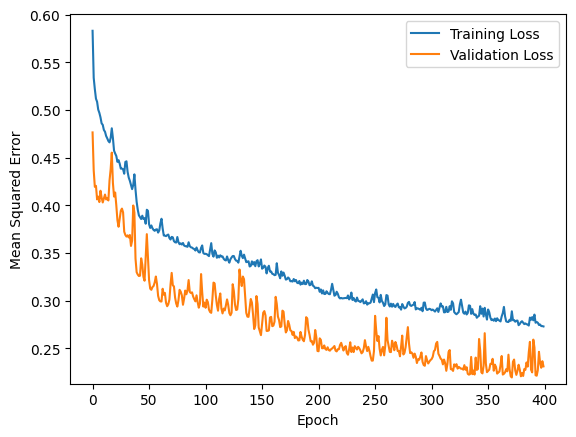


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 3ms/step - loss: 0.3449 - mean_squared_error: 0.3449


{'loss': 0.3448656499385834, 'mean_squared_error': 0.3448656499385834}

In [83]:
# The following variables are the hyperparameters.
learning_rate = 0.00012
epochs = 400
batch_size = 20

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)


In [84]:

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    # Get the features for the current row
    test_features = {name: np.array([value]) for name, value in row.items()}

    # Get the correct label for the current row
    correct_label = np.array([row[label_name]])

    # Normalize the correct label using the mean and variance
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    # Extract the predicted body fat value
    predicted_bodyfat_normalized = predictions['dense_output'][0][0]

    # Convert the predicted body fat value to the actual value
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean

    # Round the predicted body fat value to one decimal place using NumPy round function
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    # Convert the correct label back to the actual value
    actual_bodyfat = (correct_label_normalized * np.sqrt(variance)) + mean

    # Print the predicted and correct values for the current row
    print("Row:", index)
    print("Predicted Body Fat:", predicted_bodyfat)
    print("Correct Body Fat:", actual_bodyfat)
    print()

Row: 42
Predicted Body Fat: [30.8]
Correct Body Fat: [31.6]

Row: 81
Predicted Body Fat: [16.8]
Correct Body Fat: [26.8]

Row: 188
Predicted Body Fat: [22.5]
Correct Body Fat: [20.5]

Row: 39
Predicted Body Fat: [33.]
Correct Body Fat: [32.6]

Row: 189
Predicted Body Fat: [27.2]
Correct Body Fat: [24.4]

Row: 147
Predicted Body Fat: [22.8]
Correct Body Fat: [29.6]

Row: 55
Predicted Body Fat: [25.8]
Correct Body Fat: [22.6]

Row: 38
Predicted Body Fat: [40.7]
Correct Body Fat: [35.2]

Row: 112
Predicted Body Fat: [21.1]
Correct Body Fat: [22.1]

Row: 109
Predicted Body Fat: [21.3]
Correct Body Fat: [21.4]

Row: 43
Predicted Body Fat: [27.1]
Correct Body Fat: [32.]

Row: 182
Predicted Body Fat: [15.2]
Correct Body Fat: [11.5]

Row: 2
Predicted Body Fat: [15.3]
Correct Body Fat: [25.3]

Row: 117
Predicted Body Fat: [17.4]
Correct Body Fat: [13.9]

Row: 105
Predicted Body Fat: [18.2]
Correct Body Fat: [18.]

Row: 228
Predicted Body Fat: [17.5]
Correct Body Fat: [14.9]

Row: 142
Predicted 